In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Ensemble 
- 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법.
- RandomForest 와 GradientBoosting 결정트리가 분류와 회귀 문제의 다양한 데이터셋에서 효과적. 둘다 모델을 구성하는 기본 요소로 결정 트리 사용

### RandomForest
- 회귀와 분류에 있어서 랜덤 포레스트는 가장 널리 사용되는 머신러닝 알고리즘
- 과대적합 문제 회피 가능
- 기본적으로 조금씩 다른 여러 결정 트리의 묶음
- 각 트리는 비교적 예측을 잘 할 수 있지만 데이터의 일부에 과대적합하는 경향을 가진다는 아이디어에 기초
- 잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있음.
- 트리들이 달라지도록 트리 생성 시 무작위성을 주입
- 트리 생성 방법 : 1. 데이터 포인트를 무작위로 선택 / 2. 분할 테스트에서 특성을 무작위로 선택

#### RandomForest 구축
1. 생성할 트리의 개수 정하기 -> `n_estimators` (10개 가정)
2. 이 트리들은 완전히 독립적으로 만들어져야 하므로 알고리즘은 각 트리가 고유하게 만들어지도록 무작위한 선택을 함.
3. 트리를 만들기 위해 먼저 데이터의 부트스트랩 샘플 `bootstrap sample` 을 생성. 즉, n_samples개의 데이터 포인트 중에서 무작위로 데이터를 n_samples 횟수만큼 반복 추출.(중복 추출 가능->누락되는 데이터 있을 수 있음)
4. 결정 트리 생성 시 각 노드에서 전체 특성을 대상으로 최선의 테스트를 찾는 것이 아니고, **알고리즘이 각 노드에서 후보 특성을 무작위로 선택한 후 이 후보들 중에서 최선의 테스트를 찾음**
5. 몇개의 특성을 고를지는 `max_features` 매개변수로 조정가능. 후보특성을 고르는 것은 매 노드마다 반복되므로 트리의 각 노드는 다른 후보 특성들을 사용하여 테스트를 만듦.
* 추가 설명: max_features 를 n_features 로 설정하면 트리의 각 분기에서 모든 특성을 고려하므로 특성 선택에 무작위성이 들어가지 않음(부트스랩 샘플링으로 읺나 무작위성은 그대로임)
6. 모델에 있는 모든 트리의 예측을 만듦
> 회귀: 예측들을 평균하여 최종 예측 만듦  
> 분류: 약한 투표전략을 사용. 각 알고리즘이 가능성 있는 출력 레이블의 확률을 제공함으로써 간접적인 예측 (**Voting**). 트리들이 예측한 확률을 평균내어 가장 높은 확률을 가진 클래스가 예측값이 됨

#### RandomForest 분석

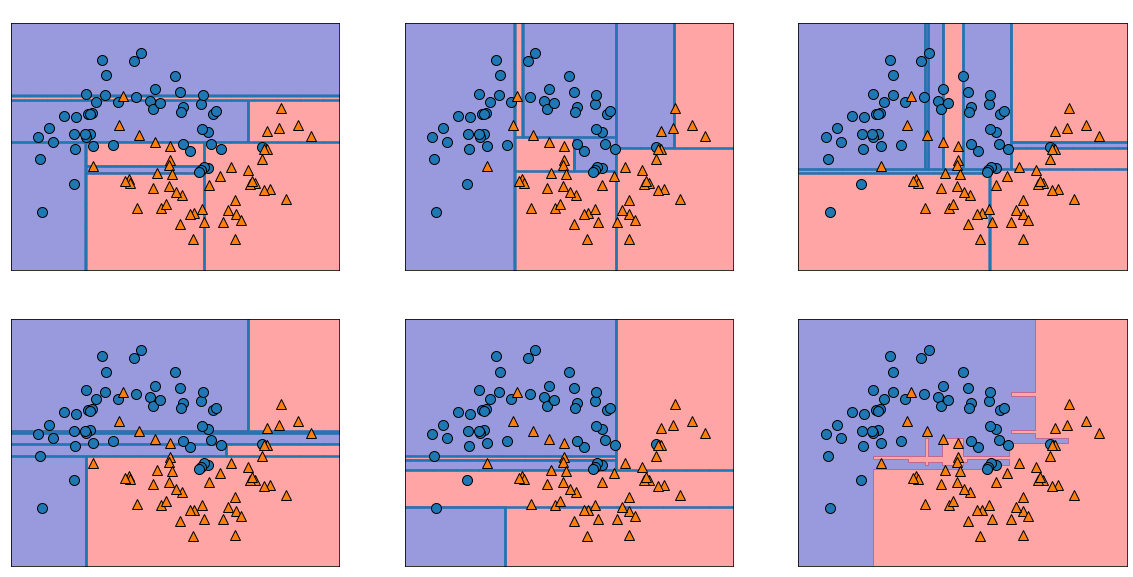

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train,X_test, y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train,y_train)
#  랜덤포레스트 안에 만들어진 트리는 estimators_ 속성에 저장됨. 

# 다섯개의 랜덤한 결정 트리의 결정 경계와 예측한 확률을 평균내어 만든 결정경계
fig,axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f'tree{i}',color='white')
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(forest,X,fill=True,ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title('RandomForest', color='white')
mglearn.discrete_scatter(X[:,0],X[:,1],y)

> [결과 해석]  
    부트스트랩 샘플링 때문에 한쪽 트리에 나타나는 훈련 포인트가 다른 트리에는 포함되지 않을 수 있어 각 트리는 불완전함.
    랜덤포레스트는 개개의 트리보다는 덜 과대적합되고 더 좋은 결정경계 만들어좀.

In [3]:
# 유방암 데이터에 적용
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print(f'train accuracy:{forest.score(X_train,y_train):.3f}')
print(f'test accuracy:{forest.score(X_test,y_test):.3f}')

# 사전가지치기 안해도 단일 결정트리보다 높은 정확도 보임

train accuracy:1.000
test accuracy:0.972


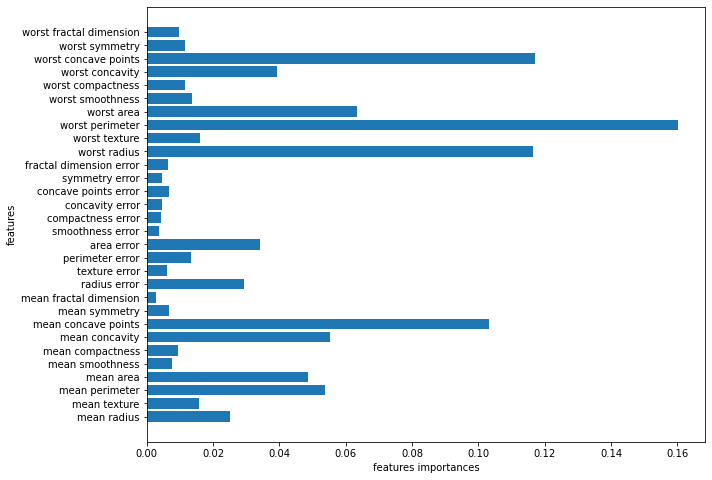

In [4]:
# 특성중요도 
def plot_feature_importaces_cancer(model):
    n_features= cancer.data.shape[1]
    plt.figure(figsize=(10,8))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('features importances')
    plt.ylabel('features')

plot_feature_importaces_cancer(forest)

> [결과해석]
    단일 트리보다 훨씬 더 많은 특성이 0이상의 중요도 값을 가짐.  
    랜덤포레스트를 만드는 무작위성은 알고리즘이 가능성 있는 많은 경우를 고려할 수 있으므로, 그 결과 랜덤 포레스트가 단일 트리보다 더 넓은 시각으로 데이터를 바라볼 수 있음

#### 장단점과 매개변수

**`장점`**
1. 성능이 매우 띄어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며 데이터의 스케일을 맞출 필요도 없음.
2. 기본적으로 단일 트리의 단점을 보완하고 장점은 그대로 가지고 있음.
3. 매우 큰 데이터셋에도 잘 작동하며 여러 CPU 코어로 간단하게 병렬화할 수 있음

**`주의`**
1. 다른 random_state를 지정하거나 지정하지 않으면 전혀 다른 모델이 됨. 랜덤 포레스트의 트리가 많을수록 random_state 값의 변화에 따른 변동이 적음

**`단점`**
1. 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않음.-> 선형 모델이 더 적합
2. 선형 모델보다 많은 메모리를 사용하며 훈련과 예측이 느림.

**`매개변수`**
1.  n_estimators, max_features -> n_estimators는 클수록 좋음.
2. max_depth와 같은 사전 가지치기 옵션도 있음.
3. 분류: max_features = sqrt(n_features)
4. 회귀: max_features = n_features
------------------------------

### GradientBoostingClassifier (그래디언트 부스팅 회귀트리)
-  회귀와 분류에 모두 사용할 수 있음
- 램덤 포레스트와 달리 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듦.
- 무작위성 없음. 대신 강력한 사전 가지치기가 사용됨.
- 깊지 않은 트리 사용. 근본 아이디어는 얕은 트리 같은 간단한 모델(약한학습기 weak learner) 을 많이 연결하는 것.
- 각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어서 트리가 많이 추가될수록 성능이 좋아짐.

**`learning_rate`** : 이전 트리의 오차를 얼마나 가장 강하게 보정할 것인지를 제어하는 매개변수. 학습률이 클르수록 보정을 강하게해 모델이 복잡해짐
- n_estimators 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회가 더 많이 생김.

In [5]:
# 유방암 데이터
 
from sklearn.ensemble import GradientBoostingClassifier

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print(f'train accuracy:{gbrt.score(X_train,y_train):.3f}')
print(f'test accuracy:{gbrt.score(X_test,y_test):.3f}')

# 과대적합 발생->학습률 낮출 필요 있음 or 사전 가지치기

train accuracy:1.000
test accuracy:0.965


In [7]:
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

print(f'train accuracy:{gbrt.score(X_train,y_train):.3f}')
print(f'test accuracy:{gbrt.score(X_test,y_test):.3f}')

train accuracy:0.988
test accuracy:0.965


train accuracy:0.991
test accuracy:0.972


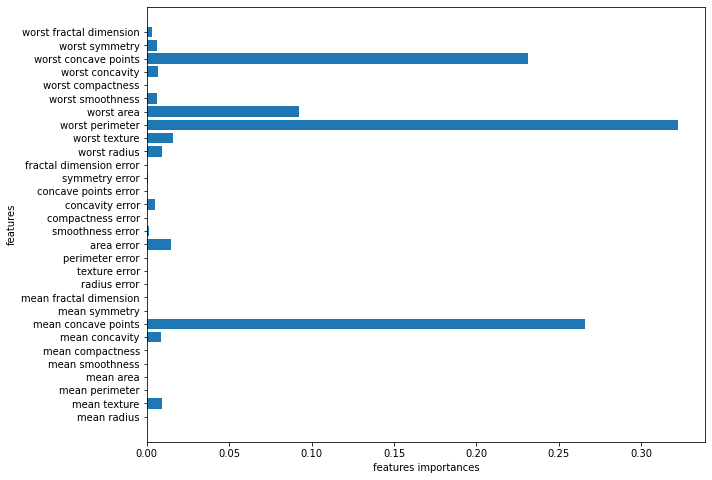

In [8]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

print(f'train accuracy:{gbrt.score(X_train,y_train):.3f}')
print(f'test accuracy:{gbrt.score(X_test,y_test):.3f}')

plot_feature_importaces_cancer(gbrt)

# 사전가지치기 한게 학습률 낮춘것보다 테스트 정확도 높음

> `해석`
    랜덤포레스트와 비슷하지만 일부 특성을 완전히 무시하고 있음.  
    비슷한 종류의 데이터에서 둘다 잘 작동하지만 조금 더 안정적인 랜덤포레스트를 먼저 적용함.   
    랜덤포레스트가 잘 작동하더라도 예측 시간이 중요하거나 머신러닝 모델에서 마지막 성능까지 쥐어짜야할 때 그래디언트 부스팅을 사용하면 됨.

+ 대규모 머신러닝 문제에 그래디언트 부스팅을 적용하려면 xgboost 패키지와 파이썬 인터페이스를 검토해보는 것이 좋음. 

### `장단점과 매개변수`

**`매개변수`**
1. n_estimators : 트리 개수 지정
2. learning_rate : 이전 트리의 오차를 보정하는 정도
3. 두 매개변수는 매우 깊게 연관되며 learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해서 더 많은 트리를 추가해야함.
4. n_estimators 가 클수록 좋은 RandomForest와 달리 GradientBoosing 에서는 복잡도가 높아져 과대적합될 가능성이 높아짐. 
5. max_depth(or max_leaf_nodes): 각 트리의 복잡도를 낮춤.통상 그래디언트부스틍에서는 매우 작게 설정하여 깊이가 5보다 깊어지지 않게함.

**`장점`**
1. 다른 트리기반 모델처럼 특성의 스케일을 조정하지 않아도 되고 이진 특성이나 연속적인 특성에서도 잘 작동

**`단점`**
1. 매개변수를 잘 조정해야함. 
2. 훈련시간이 김.
3. 트리 기반 모델의 특성상 희소한 고차원 데이터에는 잘 작동하지 않음. 
-----------------------------


### 배깅/엑스트라 트리/에이다부스트

In [15]:
# import preamble
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm,ym = make_moons(n_samples=100, noise=0.25,random_state=3)
Xm_train,Xm_test,ym_train,ym_test = train_test_split(Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train,Xc_test, yc_train,yc_test = train_test_split(cancer.data,cancer.target,random_state=0)

#### Bagging
- Bootstrap Aggregating의 줄임말
- 중복을 허용한 랜덤 샘플링으로 만든 훈련 데이터 세트를 사용하여 분류기를 각기 다르게 학습시킴.
- 분류기가 **predict_proba()** 메서드를 지원하는 경우 확률값을 평균하여 예측을 수행. 그렇지 않으면 가장 빈도가 높은 클래스 레이블이 예측 결과가 됨

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier


#OOB(out of bag) true 로 지정하면 매개변수는 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가 : OOB오차 , 기본값은 False
bagging = BaggingClassifier(LogisticRegression(),n_estimators=100,oob_score=True,n_jobs=-1,random_state=42)
bagging.fit(Xc_train,yc_train)

print(f'train accuracy:{bagging.score(Xc_train,yc_train):.3f}')
print(f'test accuracy:{bagging.score(Xc_test,yc_test):.3f}')
print(f'OOB sample accuracy:{(bagging.oob_score_):.3f}')


train accuracy:0.953
test accuracy:0.958
OOB sample accuracy:0.944


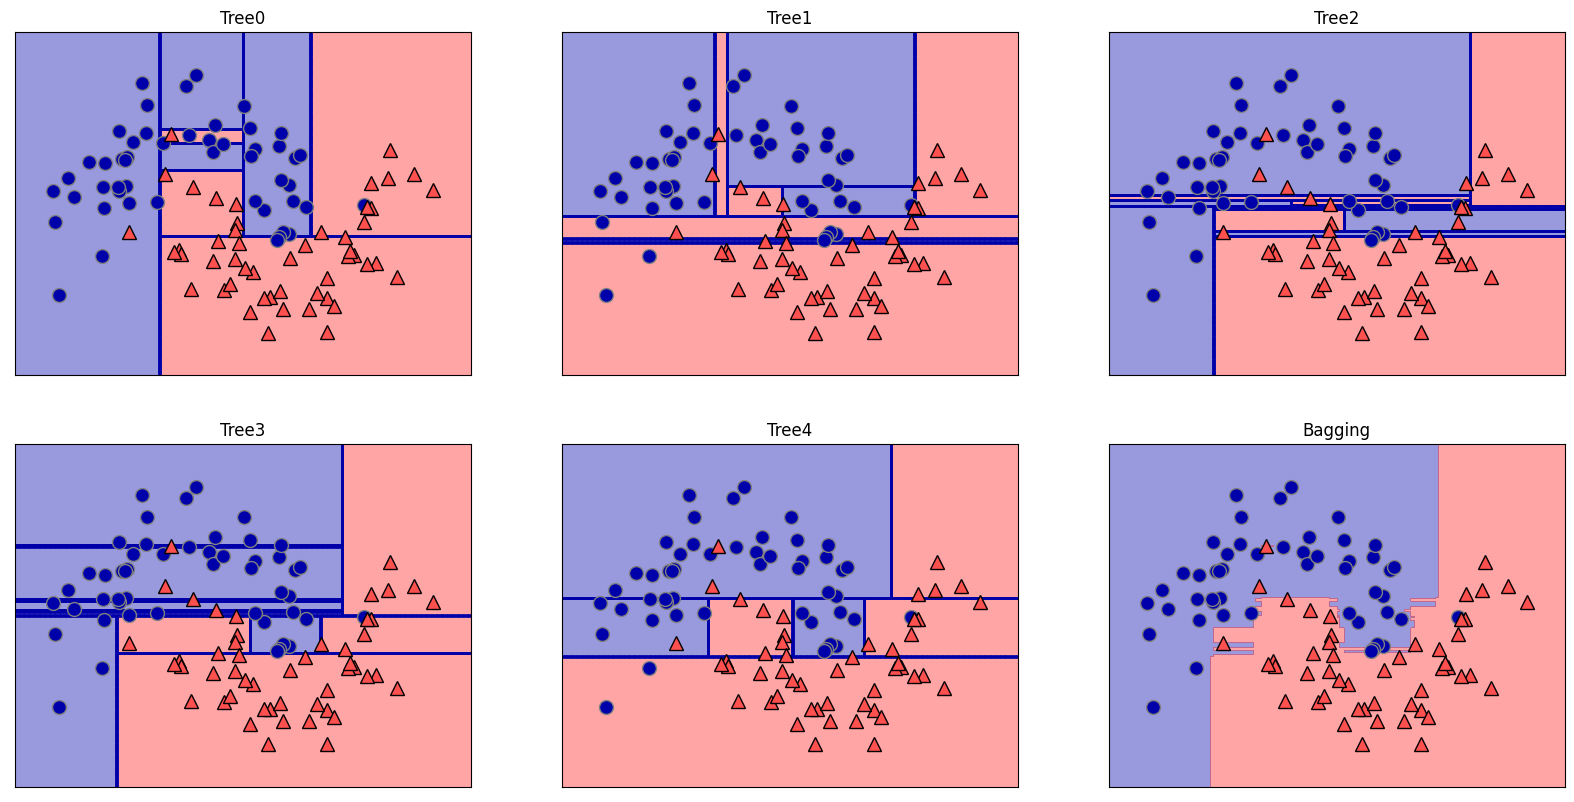

In [19]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(),n_estimators=5, n_jobs=-1,random_state=42)
bagging.fit(Xm_train,ym_train)

fig,axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),bagging.estimators_)):
    ax.set_title(f'Tree{i}')
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(bagging,Xm,fill=True,ax =axes[-1,-1], alpha=.4)
axes[-1,-1].set_title('Bagging')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

> 랜덤 포레스트의 결정경계와 매우 비슷

In [20]:
bagging = BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,oob_score=True,n_jobs=-1,random_state=42)
bagging.fit(Xc_train,yc_train)

print(f'train accuracy:{bagging.score(Xc_train,yc_train):.3f}')
print(f'test accuracy:{bagging.score(Xc_test,yc_test):.3f}')
print(f'OOB sample accuracy:{(bagging.oob_score_):.3f}')


train accuracy:1.000
test accuracy:0.965
OOB sample accuracy:0.948


+ 배깅은 랜덤포레스트와 달리 max_samples 매개변수에서 부트스트랩 샘플의 크기를 지정할 수 있음
+ 또한 랜덤포레스트는 DecisionTreeClassifier(splitter='best')를 사용하도록 고정되어 있음
+ 결정트리를 splitter = 'random'으로 설정하면 무작위로 분할한 후보 노드 중에서 최선의 분할을 찾음.

#### Extra-Trees